   Dead Chum  Dead Coho  Live Chum  Live Coho Survey Date
0          0          0          0          0  2019-12-10
1          2          0          1          0  2019-12-07
2         11          0          4          0  2019-12-04
3          4          0         19          0  2019-11-30
4         17          2         12          1  2019-11-23
5          1          0          0          0  2019-11-19
6          4          0          9          1  2019-11-16
7          1         17          0          1  2019-10-26
8          1          0          4          0  2019-11-09
9          1          0          2          0  2019-11-02


<AxesSubplot:xlabel='Survey Date'>

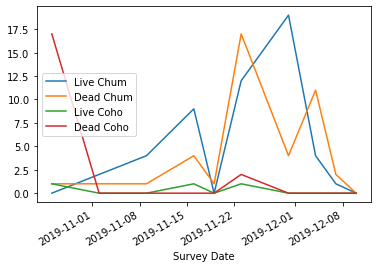

In [15]:
def getEntries(uri):
    request = requests.get(url = uri)
    df = pd.DataFrame(request.json()['data']['entries'])
    while request.json()['links']['next'] is not None:
        nextURL = request.json()['links']['next']
        request = requests.get(url = nextURL)
        df = df.append(pd.DataFrame(request.json()['data']['entries']))
    return df

def addStats(survey, salmonDf):
    surveyUUID = survey['ec5_uuid'] #get series (weird pandas array) of all uuids for today's survey
    todaySalmonDf = salmonDf[salmonDf['ec5_parent_uuid'] == surveyUUID] 
    deadChum = int(todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Chum") & (todaySalmonDf['16_Status'] == "Dead"))].shape[0]) 
    deadCoho = int(todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Coho") & (todaySalmonDf['16_Status'] == "Dead"))].shape[0])
    liveChum = int(todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Chum") & (todaySalmonDf['16_Status'] == "Live"))].shape[0])
    liveCoho = int(todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Coho") & (todaySalmonDf['16_Status'] == "Live"))].shape[0])
    statsRow = {'Survey Date': datetime.datetime.strptime(survey['1_Survey_Date'], '%m/%d/%Y'), 'Dead Chum': deadChum, 'Dead Coho': deadCoho, 'Live Chum': liveChum, 'Live Coho': liveCoho}
    global statsDf
    statsDf = statsDf.append(statsRow, ignore_index = True)
    
import requests, json, datetime, matplotlib.pyplot, pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 0)
salmonFormURI = "https://five.epicollect.net/api/export/entries/salmon-survey-2019?form_ref=397fba6ecc674b74836efc190840c42d_5d6f509867795"
surveyFormURI = "https://five.epicollect.net/api/export/entries/salmon-survey-2019?form_ref=397fba6ecc674b74836efc190840c42d_5d6f454667a28"
salmonDf = getEntries(salmonFormURI)
surveyDf = getEntries(surveyFormURI)
statsDf = pd.DataFrame()
#surveyDf.apply(printStatsFromSurvey, axis=1, args=[salmonDf])
surveyDf.apply(addStats, axis=1, args=[salmonDf]) #replacing print method with create addStats - to create stats df
print(statsDf)
statsDf.plot(y=['Live Chum','Dead Chum', 'Live Coho', 'Dead Coho'], x='Survey Date')



# should make a new df of the counts maybe
# surveyDate | Dead Chum | Dead Coho | Live Chum | Live Coho